Name: Lavanya Deole

Net ID: lnd2037

Assignment 2

1.⁠ ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

import pandas as pd

import matplotlib.pyplot as plt

# Read the dataset

url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)

----- Write your code below this after running above above code-----------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

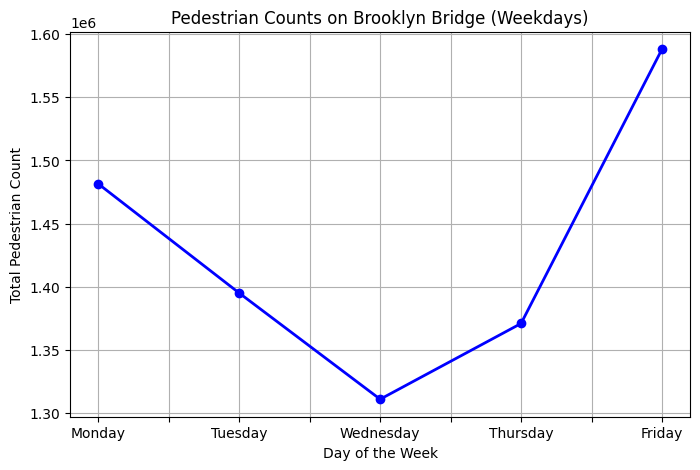

In [5]:
# Convert 'hour_beginning' to datetime (fixes previous errors)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

# Drop any rows where 'hour_beginning' could not be converted
df.dropna(subset=['hour_beginning'], inplace=True)

# Extract the day of the week (Monday = 0, Sunday = 6)
df['DayOfWeek'] = df['hour_beginning'].dt.day_name()

# Filter only weekdays (Monday to Friday)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
df_weekdays = df[df['DayOfWeek'].isin(weekdays)].copy()

# Convert pedestrian counts to numeric (handle potential issues)
df_weekdays['Pedestrians'] = pd.to_numeric(df_weekdays['Pedestrians'], errors='coerce')

# Aggregate pedestrian counts for each weekday
df_weekdays_grouped = df_weekdays.groupby('DayOfWeek', sort=False)['Pedestrians'].sum().reindex(weekdays)

# Plot pedestrian counts by weekday
plt.figure(figsize=(8, 5))
df_weekdays_grouped.plot(kind='line', marker='o', color='b', linewidth=2)
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts on Brooklyn Bridge (Weekdays)")
plt.grid(True)
plt.show()


2.⁠ ⁠Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

-This question requires you to show the relationship between a numerical feature(Pedestrians) and a non-numerical feature(Weather Summary). In such instances we use Encoding. Each weather condition can be encoded as numbers( 0,1,2..). This technique is called One-hot encoding.

-Correlation matrices may not always be the most suitable visualization method for relationships involving categorical data points, nonetheless this was given as a question to help you understand the concept better.


Correlation matrix between pedestrian counts and weather conditions:
                             Pedestrians  Weather_clear-day  \
Pedestrians                     1.000000           0.339433   
Weather_clear-day               0.339433           1.000000   
Weather_clear-night            -0.378187          -0.228109   
Weather_cloudy                 -0.081933          -0.224444   
Weather_fog                    -0.026531          -0.022041   
Weather_partly-cloudy-day       0.497585          -0.221317   
Weather_partly-cloudy-night    -0.282736          -0.175787   
Weather_rain                   -0.138987          -0.119862   
Weather_sleet                  -0.017136          -0.013281   
Weather_snow                   -0.034149          -0.028994   
Weather_wind                   -0.000196          -0.009389   

                             Weather_clear-night  Weather_cloudy  Weather_fog  \
Pedestrians                            -0.378187       -0.081933    -0.026531   
Weather_cle

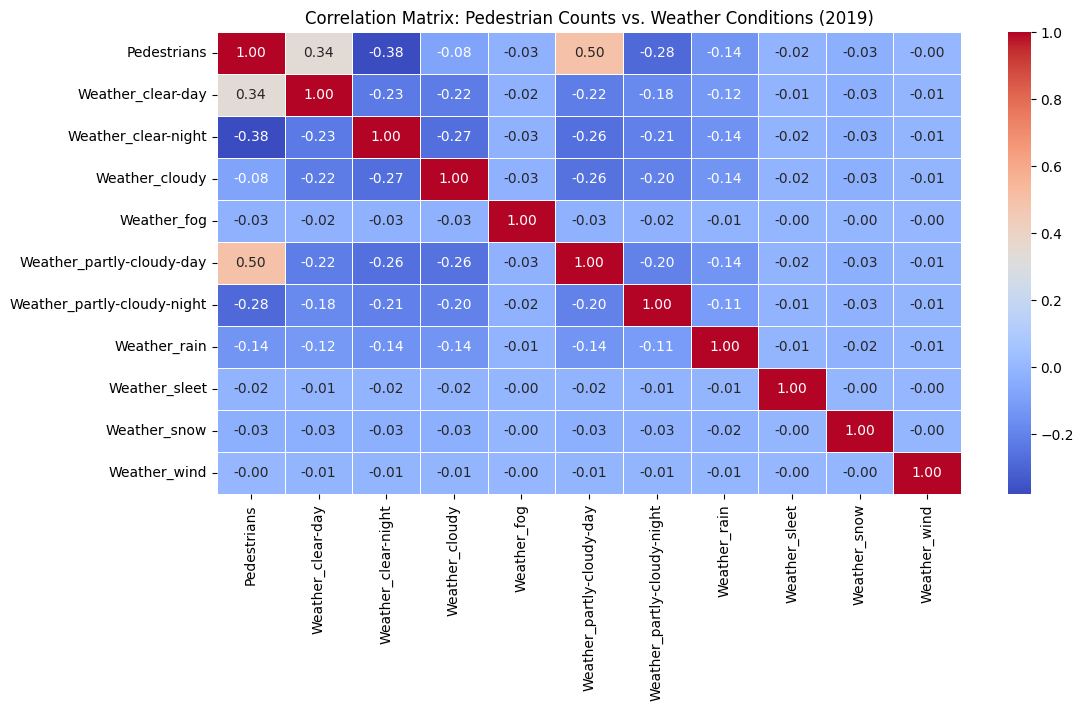

In [6]:
# Convert 'hour_beginning' to datetime and filter for 2019
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')
df_2019 = df[df['hour_beginning'].dt.year == 2019].copy()

# Ensure 'Pedestrians' column is numeric
df_2019['Pedestrians'] = pd.to_numeric(df_2019['Pedestrians'], errors='coerce')

# Check if the dataset contains a 'weather_summary' column
if 'weather_summary' in df_2019.columns:
    # Drop any rows with missing weather data
    df_2019.dropna(subset=['weather_summary'], inplace=True)

    # Apply One-Hot Encoding to the 'weather_summary' column
    weather_dummies = pd.get_dummies(df_2019['weather_summary'], prefix='Weather')

    # Concatenate one-hot encoded weather data to the main DataFrame
    df_2019_encoded = pd.concat([df_2019, weather_dummies], axis=1)

    # Create a correlation matrix including pedestrian counts and weather encodings
    correlation_columns = ['Pedestrians'] + list(weather_dummies.columns)
    corr_matrix = df_2019_encoded[correlation_columns].corr()

    # Display the correlation matrix
    print("\nCorrelation matrix between pedestrian counts and weather conditions:")
    print(corr_matrix, "\n")

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix: Pedestrian Counts vs. Weather Conditions (2019)")
    plt.show()

else:
    print("Column 'weather_summary' not found; skipping weather analysis.")

3.⁠ ⁠Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

-Students can also show plots analyzing activity.

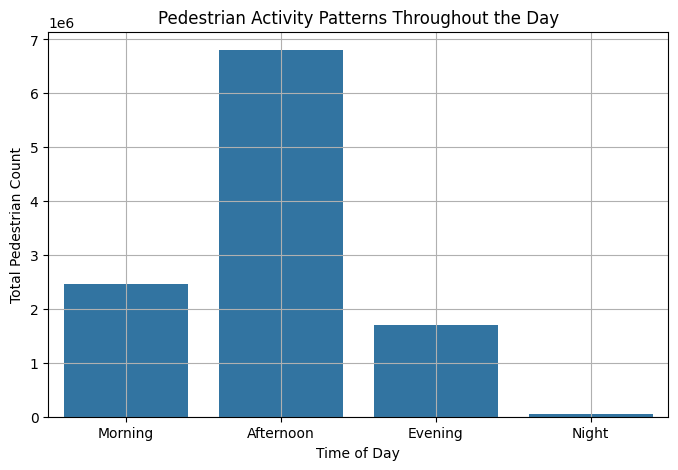

In [7]:
# Convert 'hour_beginning' to datetime
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], errors='coerce')

# Drop rows with invalid datetime values
df.dropna(subset=['hour_beginning'], inplace=True)

# Extract hour from the timestamp
df['Hour'] = df['hour_beginning'].dt.hour

# Custom function to categorize time into morning, afternoon, evening, and night
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply function to create a new column
df['Time Category'] = df['Hour'].apply(categorize_time)

# Convert pedestrian counts to numeric
df['Pedestrians'] = pd.to_numeric(df['Pedestrians'], errors='coerce')

# Aggregate pedestrian counts by time category
df_time_category = df.groupby('Time Category')['Pedestrians'].sum().reset_index()

# Ensure the order of categories for plotting
df_time_category['Sort Order'] = df_time_category['Time Category'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})
df_time_category = df_time_category.sort_values('Sort Order')

# Plot pedestrian activity by time category
plt.figure(figsize=(8, 5))
sns.barplot(x='Time Category', y='Pedestrians', data=df_time_category, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Activity Patterns Throughout the Day")
plt.grid(True)
plt.show()